In [1]:
from math import log, pi, cosh, sin, tanh, cos
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import copy
from sklearn import linear_model

In [20]:
theroot = r'..\logs'
nns = [5, 10, 15, 25, 50, 65, 85, 100]
lrs = [0.2, 0.4, 0.6, 0.8, 1.0]
nncolors=['darkviolet', 'royalblue', 'crimson', 'orange', 'green', 'black', 'darkred', 'yellow']
overloadednndatas = dict();
overloadedlrdatas = dict();

In [23]:
thistype = {'formats': ('i4', 'i4', 'f2', 'f4', 'f4', 'f4', 'f4', 'S4', 'f2')}
thesenames = ('nnodes', 'nframes', 'tgen', 'texec', 'tmean', 'tstd', 'trpt', 'load', 'loadrate')

fulldata = pd.DataFrame(columns=thesenames)

for nn in nns:
    nndata = pd.read_table(r'%s\%s.txt' %(theroot, nn), sep=' ', dtype=thistype, names=thesenames);
    overloadednndata = nndata[nndata['load']=='overloaded']
    fulldata = fulldata.append(overloadednndata)    
    overloadednndatas[nn] = overloadednndata

for lr in lrs:
    overloadedlrdatas[lr] = fulldata[fulldata['loadrate']==lr]

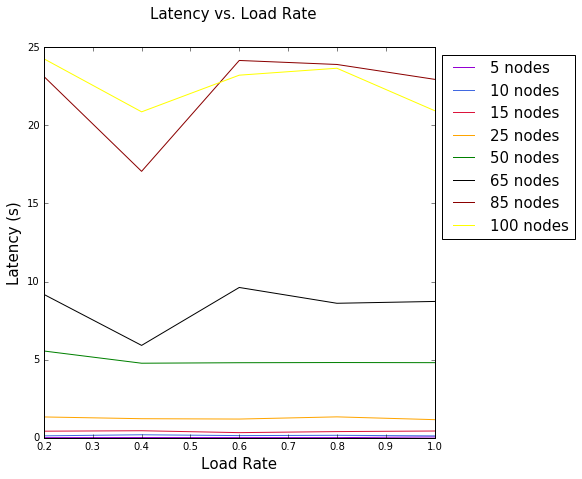

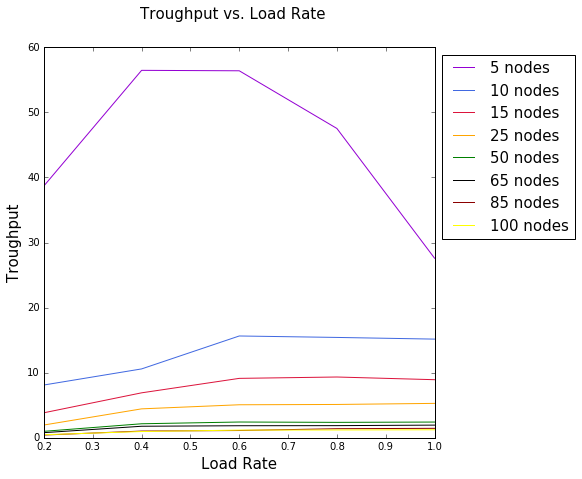

In [25]:
plt.figure(figsize=(7,7))
ax = plt.axes()
# ax.set(xlim=[0, 1.1])
for nn, color in zip(nns, nncolors):
    loadrate = overloadednndatas[nn]['loadrate']
    latency = overloadednndatas[nn]['tmean']
    plt.plot(loadrate, latency, color = color, linewidth=1.0, label=r'%s nodes' %(nn))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=15)
plt.suptitle(r'Latency vs. Load Rate', fontsize=15)
plt.xlabel(r'Load Rate', fontsize=15)
plt.ylabel(r'Latency (s)', fontsize=15)

xytraj = plt.figure(figsize=(7,7))
ax = plt.axes()
# ax.set(xlim=[0, 1])
for nn, color in zip(nns, colors):
    loadrate = overloadednndatas[nn]['loadrate']
    throughput = overloadednndatas[nn]['trpt']
    plt.plot(loadrate, throughput, color = color, linewidth=1.0, label=r'%s nodes' %(nn))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title="", ncol=1, fontsize=15)
plt.suptitle(r'Troughput vs. Load Rate', fontsize=15)
plt.xlabel(r'Load Rate', fontsize=15)
plt.ylabel(r'Troughput', fontsize=15)

plt.figure(figsize=(7,7))
ax = plt.axes()
# ax.set(xlim=[0, 1.1])
for nn, color in zip(nns, colors):
    loadrate = overloadednndatas[nn]['loadrate']
    latency = overloadednndatas[nn]['tmean']
    plt.plot(loadrate, latency, color = color, linewidth=1.0, label=r'%s nodes' %(nn))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=15)
plt.suptitle(r'Latency vs. Load Rate', fontsize=15)
plt.xlabel(r'Load Rate', fontsize=15)
plt.ylabel(r'Latency (s)', fontsize=15)

# xytraj = plt.figure(figsize=(7,7))
# ax = plt.axes()
# # ax.set(xlim=[0, 1])
# plt.scatter(loadrate, throughput, color ='darkred', linewidth=0.5) #, linewidth=0.7)